# Data Science Final Project
Charles Laurent, Jenny Park, AJ Marino

## Sandbox

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import metrics

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:96% !important; }</style>"))

pd.set_option('display.max_columns', None)

In [3]:
# TODO - Update path to files
datadir='../dev/project/CollegeScorecard_Raw_Data'

# TODO set features_dir 
features_dir = './data'


In [4]:
# import collegedatalib
import collegedatahelper

In [5]:
%%time
data_dict = collegedatahelper.create_data_dict_full(datadir)

CPU times: user 3min 24s, sys: 29 s, total: 3min 53s
Wall time: 3min 57s


In [6]:
df_12 = data_dict['2012_13']
df = data_dict['2013_14']
df_new = data_dict['2017_18']

In [7]:
df.head()

UNITID    OPEID  OPEID6                               INSTNM        CITY  \
0  100654   100200    1002             Alabama A & M University      Normal   
1  100663   105200    1052  University of Alabama at Birmingham  Birmingham   
2  100690  2503400   25034                   Amridge University  Montgomery   
3  100706   105500    1055  University of Alabama in Huntsville  Huntsville   
4  100724   100500    1005             Alabama State University  Montgomery   

  STABBR         ZIP  ACCREDAGENCY  INSTURL  NPCURL  SCH_DEG  HCM2  MAIN  \
0     AL       35762           NaN      NaN     NaN      3.0   NaN     1   
1     AL  35294-0110           NaN      NaN     NaN      3.0   NaN     1   
2     AL  36117-3553           NaN      NaN     NaN      3.0   NaN     1   
3     AL       35899           NaN      NaN     NaN      3.0   NaN     1   
4     AL  36104-0271           NaN      NaN     NaN      3.0   NaN     1   

   NUMBRANCH  PREDDEG  HIGHDEG  CONTROL  ST_FIPS  REGION  LOCALE  LOCALE2  \
0          1        3        4        1        1       5     NaN      NaN   
1          1        3        4        1        1       5     NaN      NaN   
2          1        3        4        2        1       5     NaN      NaN   
3          1        3        4        1        1       5     NaN      NaN   
4          1        3        4        1        1       5     NaN      NaN   

   LATITUDE  LONGITUDE  CCBASIC  CCUGPROF  CCSIZSET  HBCU  PBI  ANNHI  TRIBAL  \
0       NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN     NaN   
1       NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN     NaN   
2       NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN     NaN   
3       NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN     NaN   
4       NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN     NaN   

   AANAPII  HSI  NANTI  MENONLY  WOMENONLY  RELAFFIL  ADM_RATE  ADM_RATE_ALL  \
0      NaN  NaN    NaN      NaN        NaN       NaN    0.8989        0.8989   
1      NaN  NaN    NaN      NaN        NaN       NaN    0.8673        0.8673   
2      NaN  NaN    NaN      NaN        NaN       NaN       NaN           NaN   
3      NaN  NaN    NaN      NaN        NaN       NaN    0.8062        0.8062   
4      NaN  NaN    NaN      NaN        NaN       NaN    0.5125        0.5125   

   SATVR25  SATVR75  SATMT25  SATMT75  SATWR25  SATWR75  SATVRMID  SATMTMID  \
0    370.0    450.0    350.0    450.0      NaN      NaN     410.0     400.0   
1    520.0    640.0    520.0    650.0      NaN      NaN     580.0     585.0   
2      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN   
3    510.0    640.0    510.0    650.0      NaN      NaN     575.0     580.0   
4    380.0    480.0    370.0    480.0      NaN      NaN     430.0     425.0   

   SATWRMID  ACTCM25  ACTCM75  ACTEN25  ACTEN75  ACTMT25  ACTMT75  ACTWR25  \
0       NaN     15.0     19.0     14.0     19.0     15.0     18.0      NaN   
1       NaN     22.0     28.0     22.0     29.0     20.0     26.0      NaN   
2       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3       NaN     23.0     29.0     22.0     30.0     22.0     28.0      NaN   
4       NaN     15.0     19.0     14.0     20.0     15.0     18.0      NaN   

   ACTWR75  ACTCMMID  ACTENMID  ACTMTMID  ACTWRMID  SAT_AVG  SAT_AVG_ALL  \
0      NaN      17.0      17.0      17.0       NaN    823.0        823.0   
1      NaN      25.0      26.0      23.0       NaN   1146.0       1146.0   
2      NaN       NaN       NaN       NaN       NaN      NaN          NaN   
3      NaN      26.0      26.0      25.0       NaN   1180.0       1180.0   
4      NaN      17.0      17.0      17.0       NaN    830.0        830.0   

   PCIP01  PCIP03  PCIP04  PCIP05  PCIP09  PCIP10  PCIP11  PCIP12  PCIP13  \
0  0.0397  0.0199  0.0116  0.0000  0.0000  0.0348  0.0348     0.0  0.1490   
1  0.0000  0.0000  0.0000  0.0018  0.0456  0.0000  0.0099     0.0  0.0862   
2  0.000

In [8]:
def getNyuDTI(df):
    nyu = df[df['INSTNM'] == 'New York University']
#     print(nyu['debt_to_income'].shape[0])
    if nyu['debt_to_income'].shape[0]:
        return nyu['debt_to_income'].values[0]
    else:
        return np.nan

In [9]:
df[df['INSTNM'] == 'New York University']

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,CIP01CERT1,CIP01CERT2,CIP01ASSOC,CIP01CERT4,CIP01BACHL,CIP03CERT1,CIP03CERT2,CIP03ASSOC,CIP03CERT4,CIP03BACHL,CIP04CERT1,CIP04CERT2,CIP04ASSOC,CIP04CERT4,CIP04BACHL,CIP05CERT1,CIP05CERT2,CIP05ASSOC,CIP05CERT4,CIP05BACHL,CIP09CERT1,CIP09CERT2,CIP09ASSOC,CIP09CERT4,CIP09BACHL,CIP10CERT1,CIP10CERT2,CIP10ASSOC,CIP10CERT4,CIP10BACHL,CIP11CERT1,CIP11CERT2,CIP11ASSOC,CIP11CERT4,CIP11BACHL,CIP12CERT1,CIP12CERT2,CIP12ASSOC,CIP12CERT4,CIP12BACHL,CIP13CERT1,CIP13CERT2,CIP13ASSOC,CIP13CERT4,CIP13BACHL,CIP14CERT1,CIP14CERT2,CIP14ASSOC,CIP14CERT4,CIP14BACHL,CIP15CERT1,CIP15CERT2,CIP15ASSOC,CIP15CERT4,CIP15BACHL,CIP16CERT1,CIP16CERT2,CIP16ASSOC,CIP16CERT4,CIP16BACHL,CIP19CERT1,CIP19CERT2,CIP19ASSOC,CIP19CERT4,CIP19BACHL,CIP22CERT1,CIP22CERT2,CIP22ASSOC,CIP22CERT4,CIP22BACHL,CIP23CERT1,CIP23CERT2,CIP23ASSOC,CIP23CERT4,CIP23BACHL,CIP24CERT1,CIP24CERT2,CIP24ASSOC,CIP24CERT4,CIP24BACHL,CIP25CERT1,CIP25CERT2,CIP25ASSOC,CIP25CERT4,CIP25BACHL,CIP26CERT1,CIP26CERT2,CIP26ASSOC,CIP26CERT4,CIP26BACHL,CIP27CERT1,CIP27CERT2,CIP27ASSOC,CIP27CERT4,CIP27BACHL,CIP29CERT1,CIP29CERT2,CIP29ASSOC,CIP29CERT4,CIP29BACHL,CIP30CERT1,CIP30CERT2,CIP30ASSOC,CIP30CERT4,CIP30BACHL,CIP31CERT1,CIP31CERT2,CIP31ASSOC,CIP31CERT4,CIP31BACHL,CIP38CERT1,CIP38CERT2,CIP38ASSOC,CIP38CERT4,CIP38BACHL,CIP39CERT1,CIP39CERT2,CIP39ASSOC,CIP39CERT4,CIP39BACHL,CIP40CERT1,CIP40CERT2,CIP40ASSOC,CIP40CERT4,CIP40BACHL,CIP41CERT1,CIP41CERT2,CIP41ASSOC,CIP41CERT4,CIP41BACHL,CIP42CERT1,CIP42CERT2,CIP42ASSOC,CIP42CERT4,CIP42BACHL,CIP43CERT1,CIP43CERT2,CIP43ASSOC,CIP43CERT4,CIP43BACHL,CIP44CERT1,CIP44CERT2,CIP44ASSOC,CIP44CERT4,CIP44BACHL,CIP45CERT1,CIP45CERT2,CIP45ASSOC,CIP45CERT4,CIP45BACHL,CIP46CERT1,CIP46CERT2,CIP46ASSOC,CIP46CERT4,CIP46BACHL,CIP47CERT1,CIP47CERT2,CIP47ASSOC,CIP47CERT4,CIP47BACHL,CIP48CERT1,CIP48CERT2,CIP48ASSOC,CIP48CERT4,CIP48BACHL,CIP49CERT1,CIP49CERT2,CIP49ASSOC,CIP49CERT4,CIP49BACHL,CIP50CERT1,CIP50CERT2,CIP50ASSOC,CIP50CERT4,CIP50BACHL,CIP51CERT1,CIP51CERT2,CIP51ASSOC,CIP51CERT4,CIP51BACHL,CIP52CERT1,CIP52CERT2,CIP52ASSOC,CIP52CERT4,CIP52BACHL,CIP54CERT1,CIP54CERT2,CIP54ASSOC,CIP54CERT4,CIP54BACHL,DISTANCEONLY,UGDS,UG,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,UGDS_WHITENH,UGDS_BLACKNH,UGDS_API,UGDS_AIANOLD,UGDS_HISPOLD,UG_NRA,UG_UNKN,UG_WHITENH,UG_BLACKNH,UG_API,UG_AIANOLD,UG_HISPOLD,PPTUG_EF,PPTUG_EF2,CURROPER,NPT4_PUB,NPT4_PRIV,NPT4_PROG,NPT4_OTHER,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,NPT41_PROG,NPT42_PROG,NPT43_PROG,NPT44_PROG,NPT45_PROG,NPT41_OTHER,NPT42_OTHER,NPT43_OTHER,NPT44_OTHER,NPT45_OTHER,NPT4_048_PUB,NPT4_048_PRIV,NPT4_048_PROG,NPT4_048_OTHER,NPT4_3075_PUB,NPT4_3075_PRIV,NPT4_75UP_PUB,NPT4_75UP_PRIV,NPT4_3075_PROG,NPT4_3075_OTHER,NPT4_75UP_PROG,NPT4_75UP_OTHER,NUM4_PUB,NUM4_PRIV,NUM4_PROG,NUM4_OTHER,NUM41_PUB,NUM42_PUB,NUM43_PUB,NUM44_PUB,NUM45_PUB,NUM41_PRIV,NUM42_PRIV,NUM43_PRIV,NUM44_PRIV,NUM45_PRIV,NUM41_PROG,NUM42_PROG,NUM43_PROG,NUM44_PROG,NUM45_PROG,NUM41_OTHER,NUM42_OTHER,NUM43_OTHER,NUM44_OTHER,NUM45_OTHER,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,PCTPELL,C150_4,C150_L4,C150_4_POOLED,C150_L4_POOLED,POOLYRS,PFTFTUG1_EF,D150_4,D150_L4,D150_4_POOLED

In [10]:
df[df['INSTNM'] == 'University of Pennsylvania']

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,CIP01CERT1,CIP01CERT2,CIP01ASSOC,CIP01CERT4,CIP01BACHL,CIP03CERT1,CIP03CERT2,CIP03ASSOC,CIP03CERT4,CIP03BACHL,CIP04CERT1,CIP04CERT2,CIP04ASSOC,CIP04CERT4,CIP04BACHL,CIP05CERT1,CIP05CERT2,CIP05ASSOC,CIP05CERT4,CIP05BACHL,CIP09CERT1,CIP09CERT2,CIP09ASSOC,CIP09CERT4,CIP09BACHL,CIP10CERT1,CIP10CERT2,CIP10ASSOC,CIP10CERT4,CIP10BACHL,CIP11CERT1,CIP11CERT2,CIP11ASSOC,CIP11CERT4,CIP11BACHL,CIP12CERT1,CIP12CERT2,CIP12ASSOC,CIP12CERT4,CIP12BACHL,CIP13CERT1,CIP13CERT2,CIP13ASSOC,CIP13CERT4,CIP13BACHL,CIP14CERT1,CIP14CERT2,CIP14ASSOC,CIP14CERT4,CIP14BACHL,CIP15CERT1,CIP15CERT2,CIP15ASSOC,CIP15CERT4,CIP15BACHL,CIP16CERT1,CIP16CERT2,CIP16ASSOC,CIP16CERT4,CIP16BACHL,CIP19CERT1,CIP19CERT2,CIP19ASSOC,CIP19CERT4,CIP19BACHL,CIP22CERT1,CIP22CERT2,CIP22ASSOC,CIP22CERT4,CIP22BACHL,CIP23CERT1,CIP23CERT2,CIP23ASSOC,CIP23CERT4,CIP23BACHL,CIP24CERT1,CIP24CERT2,CIP24ASSOC,CIP24CERT4,CIP24BACHL,CIP25CERT1,CIP25CERT2,CIP25ASSOC,CIP25CERT4,CIP25BACHL,CIP26CERT1,CIP26CERT2,CIP26ASSOC,CIP26CERT4,CIP26BACHL,CIP27CERT1,CIP27CERT2,CIP27ASSOC,CIP27CERT4,CIP27BACHL,CIP29CERT1,CIP29CERT2,CIP29ASSOC,CIP29CERT4,CIP29BACHL,CIP30CERT1,CIP30CERT2,CIP30ASSOC,CIP30CERT4,CIP30BACHL,CIP31CERT1,CIP31CERT2,CIP31ASSOC,CIP31CERT4,CIP31BACHL,CIP38CERT1,CIP38CERT2,CIP38ASSOC,CIP38CERT4,CIP38BACHL,CIP39CERT1,CIP39CERT2,CIP39ASSOC,CIP39CERT4,CIP39BACHL,CIP40CERT1,CIP40CERT2,CIP40ASSOC,CIP40CERT4,CIP40BACHL,CIP41CERT1,CIP41CERT2,CIP41ASSOC,CIP41CERT4,CIP41BACHL,CIP42CERT1,CIP42CERT2,CIP42ASSOC,CIP42CERT4,CIP42BACHL,CIP43CERT1,CIP43CERT2,CIP43ASSOC,CIP43CERT4,CIP43BACHL,CIP44CERT1,CIP44CERT2,CIP44ASSOC,CIP44CERT4,CIP44BACHL,CIP45CERT1,CIP45CERT2,CIP45ASSOC,CIP45CERT4,CIP45BACHL,CIP46CERT1,CIP46CERT2,CIP46ASSOC,CIP46CERT4,CIP46BACHL,CIP47CERT1,CIP47CERT2,CIP47ASSOC,CIP47CERT4,CIP47BACHL,CIP48CERT1,CIP48CERT2,CIP48ASSOC,CIP48CERT4,CIP48BACHL,CIP49CERT1,CIP49CERT2,CIP49ASSOC,CIP49CERT4,CIP49BACHL,CIP50CERT1,CIP50CERT2,CIP50ASSOC,CIP50CERT4,CIP50BACHL,CIP51CERT1,CIP51CERT2,CIP51ASSOC,CIP51CERT4,CIP51BACHL,CIP52CERT1,CIP52CERT2,CIP52ASSOC,CIP52CERT4,CIP52BACHL,CIP54CERT1,CIP54CERT2,CIP54ASSOC,CIP54CERT4,CIP54BACHL,DISTANCEONLY,UGDS,UG,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,UGDS_WHITENH,UGDS_BLACKNH,UGDS_API,UGDS_AIANOLD,UGDS_HISPOLD,UG_NRA,UG_UNKN,UG_WHITENH,UG_BLACKNH,UG_API,UG_AIANOLD,UG_HISPOLD,PPTUG_EF,PPTUG_EF2,CURROPER,NPT4_PUB,NPT4_PRIV,NPT4_PROG,NPT4_OTHER,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,NPT41_PROG,NPT42_PROG,NPT43_PROG,NPT44_PROG,NPT45_PROG,NPT41_OTHER,NPT42_OTHER,NPT43_OTHER,NPT44_OTHER,NPT45_OTHER,NPT4_048_PUB,NPT4_048_PRIV,NPT4_048_PROG,NPT4_048_OTHER,NPT4_3075_PUB,NPT4_3075_PRIV,NPT4_75UP_PUB,NPT4_75UP_PRIV,NPT4_3075_PROG,NPT4_3075_OTHER,NPT4_75UP_PROG,NPT4_75UP_OTHER,NUM4_PUB,NUM4_PRIV,NUM4_PROG,NUM4_OTHER,NUM41_PUB,NUM42_PUB,NUM43_PUB,NUM44_PUB,NUM45_PUB,NUM41_PRIV,NUM42_PRIV,NUM43_PRIV,NUM44_PRIV,NUM45_PRIV,NUM41_PROG,NUM42_PROG,NUM43_PROG,NUM44_PROG,NUM45_PROG,NUM41_OTHER,NUM42_OTHER,NUM43_OTHER,NUM44_OTHER,NUM45_OTHER,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,PCTPELL,C150_4,C150_L4,C150_4_POOLED,C150_L4_POOLED,POOLYRS,PFTFTUG1_EF,D150_4,D150_L4,D150_4_POOLED

In [11]:
df[df['INSTNM'] == 'Boston University']

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,CIP01CERT1,CIP01CERT2,CIP01ASSOC,CIP01CERT4,CIP01BACHL,CIP03CERT1,CIP03CERT2,CIP03ASSOC,CIP03CERT4,CIP03BACHL,CIP04CERT1,CIP04CERT2,CIP04ASSOC,CIP04CERT4,CIP04BACHL,CIP05CERT1,CIP05CERT2,CIP05ASSOC,CIP05CERT4,CIP05BACHL,CIP09CERT1,CIP09CERT2,CIP09ASSOC,CIP09CERT4,CIP09BACHL,CIP10CERT1,CIP10CERT2,CIP10ASSOC,CIP10CERT4,CIP10BACHL,CIP11CERT1,CIP11CERT2,CIP11ASSOC,CIP11CERT4,CIP11BACHL,CIP12CERT1,CIP12CERT2,CIP12ASSOC,CIP12CERT4,CIP12BACHL,CIP13CERT1,CIP13CERT2,CIP13ASSOC,CIP13CERT4,CIP13BACHL,CIP14CERT1,CIP14CERT2,CIP14ASSOC,CIP14CERT4,CIP14BACHL,CIP15CERT1,CIP15CERT2,CIP15ASSOC,CIP15CERT4,CIP15BACHL,CIP16CERT1,CIP16CERT2,CIP16ASSOC,CIP16CERT4,CIP16BACHL,CIP19CERT1,CIP19CERT2,CIP19ASSOC,CIP19CERT4,CIP19BACHL,CIP22CERT1,CIP22CERT2,CIP22ASSOC,CIP22CERT4,CIP22BACHL,CIP23CERT1,CIP23CERT2,CIP23ASSOC,CIP23CERT4,CIP23BACHL,CIP24CERT1,CIP24CERT2,CIP24ASSOC,CIP24CERT4,CIP24BACHL,CIP25CERT1,CIP25CERT2,CIP25ASSOC,CIP25CERT4,CIP25BACHL,CIP26CERT1,CIP26CERT2,CIP26ASSOC,CIP26CERT4,CIP26BACHL,CIP27CERT1,CIP27CERT2,CIP27ASSOC,CIP27CERT4,CIP27BACHL,CIP29CERT1,CIP29CERT2,CIP29ASSOC,CIP29CERT4,CIP29BACHL,CIP30CERT1,CIP30CERT2,CIP30ASSOC,CIP30CERT4,CIP30BACHL,CIP31CERT1,CIP31CERT2,CIP31ASSOC,CIP31CERT4,CIP31BACHL,CIP38CERT1,CIP38CERT2,CIP38ASSOC,CIP38CERT4,CIP38BACHL,CIP39CERT1,CIP39CERT2,CIP39ASSOC,CIP39CERT4,CIP39BACHL,CIP40CERT1,CIP40CERT2,CIP40ASSOC,CIP40CERT4,CIP40BACHL,CIP41CERT1,CIP41CERT2,CIP41ASSOC,CIP41CERT4,CIP41BACHL,CIP42CERT1,CIP42CERT2,CIP42ASSOC,CIP42CERT4,CIP42BACHL,CIP43CERT1,CIP43CERT2,CIP43ASSOC,CIP43CERT4,CIP43BACHL,CIP44CERT1,CIP44CERT2,CIP44ASSOC,CIP44CERT4,CIP44BACHL,CIP45CERT1,CIP45CERT2,CIP45ASSOC,CIP45CERT4,CIP45BACHL,CIP46CERT1,CIP46CERT2,CIP46ASSOC,CIP46CERT4,CIP46BACHL,CIP47CERT1,CIP47CERT2,CIP47ASSOC,CIP47CERT4,CIP47BACHL,CIP48CERT1,CIP48CERT2,CIP48ASSOC,CIP48CERT4,CIP48BACHL,CIP49CERT1,CIP49CERT2,CIP49ASSOC,CIP49CERT4,CIP49BACHL,CIP50CERT1,CIP50CERT2,CIP50ASSOC,CIP50CERT4,CIP50BACHL,CIP51CERT1,CIP51CERT2,CIP51ASSOC,CIP51CERT4,CIP51BACHL,CIP52CERT1,CIP52CERT2,CIP52ASSOC,CIP52CERT4,CIP52BACHL,CIP54CERT1,CIP54CERT2,CIP54ASSOC,CIP54CERT4,CIP54BACHL,DISTANCEONLY,UGDS,UG,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,UGDS_WHITENH,UGDS_BLACKNH,UGDS_API,UGDS_AIANOLD,UGDS_HISPOLD,UG_NRA,UG_UNKN,UG_WHITENH,UG_BLACKNH,UG_API,UG_AIANOLD,UG_HISPOLD,PPTUG_EF,PPTUG_EF2,CURROPER,NPT4_PUB,NPT4_PRIV,NPT4_PROG,NPT4_OTHER,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,NPT41_PROG,NPT42_PROG,NPT43_PROG,NPT44_PROG,NPT45_PROG,NPT41_OTHER,NPT42_OTHER,NPT43_OTHER,NPT44_OTHER,NPT45_OTHER,NPT4_048_PUB,NPT4_048_PRIV,NPT4_048_PROG,NPT4_048_OTHER,NPT4_3075_PUB,NPT4_3075_PRIV,NPT4_75UP_PUB,NPT4_75UP_PRIV,NPT4_3075_PROG,NPT4_3075_OTHER,NPT4_75UP_PROG,NPT4_75UP_OTHER,NUM4_PUB,NUM4_PRIV,NUM4_PROG,NUM4_OTHER,NUM41_PUB,NUM42_PUB,NUM43_PUB,NUM44_PUB,NUM45_PUB,NUM41_PRIV,NUM42_PRIV,NUM43_PRIV,NUM44_PRIV,NUM45_PRIV,NUM41_PROG,NUM42_PROG,NUM43_PROG,NUM44_PROG,NUM45_PROG,NUM41_OTHER,NUM42_OTHER,NUM43_OTHER,NUM44_OTHER,NUM45_OTHER,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,PCTPELL,C150_4,C150_L4,C150_4_POOLED,C150_L4_POOLED,POOLYRS,PFTFTUG1_EF,D150_4,D150_L4,D150_4_POOLED

In [12]:
df[df['INSTNM'] == 'University of Iowa']

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,CIP01CERT1,CIP01CERT2,CIP01ASSOC,CIP01CERT4,CIP01BACHL,CIP03CERT1,CIP03CERT2,CIP03ASSOC,CIP03CERT4,CIP03BACHL,CIP04CERT1,CIP04CERT2,CIP04ASSOC,CIP04CERT4,CIP04BACHL,CIP05CERT1,CIP05CERT2,CIP05ASSOC,CIP05CERT4,CIP05BACHL,CIP09CERT1,CIP09CERT2,CIP09ASSOC,CIP09CERT4,CIP09BACHL,CIP10CERT1,CIP10CERT2,CIP10ASSOC,CIP10CERT4,CIP10BACHL,CIP11CERT1,CIP11CERT2,CIP11ASSOC,CIP11CERT4,CIP11BACHL,CIP12CERT1,CIP12CERT2,CIP12ASSOC,CIP12CERT4,CIP12BACHL,CIP13CERT1,CIP13CERT2,CIP13ASSOC,CIP13CERT4,CIP13BACHL,CIP14CERT1,CIP14CERT2,CIP14ASSOC,CIP14CERT4,CIP14BACHL,CIP15CERT1,CIP15CERT2,CIP15ASSOC,CIP15CERT4,CIP15BACHL,CIP16CERT1,CIP16CERT2,CIP16ASSOC,CIP16CERT4,CIP16BACHL,CIP19CERT1,CIP19CERT2,CIP19ASSOC,CIP19CERT4,CIP19BACHL,CIP22CERT1,CIP22CERT2,CIP22ASSOC,CIP22CERT4,CIP22BACHL,CIP23CERT1,CIP23CERT2,CIP23ASSOC,CIP23CERT4,CIP23BACHL,CIP24CERT1,CIP24CERT2,CIP24ASSOC,CIP24CERT4,CIP24BACHL,CIP25CERT1,CIP25CERT2,CIP25ASSOC,CIP25CERT4,CIP25BACHL,CIP26CERT1,CIP26CERT2,CIP26ASSOC,CIP26CERT4,CIP26BACHL,CIP27CERT1,CIP27CERT2,CIP27ASSOC,CIP27CERT4,CIP27BACHL,CIP29CERT1,CIP29CERT2,CIP29ASSOC,CIP29CERT4,CIP29BACHL,CIP30CERT1,CIP30CERT2,CIP30ASSOC,CIP30CERT4,CIP30BACHL,CIP31CERT1,CIP31CERT2,CIP31ASSOC,CIP31CERT4,CIP31BACHL,CIP38CERT1,CIP38CERT2,CIP38ASSOC,CIP38CERT4,CIP38BACHL,CIP39CERT1,CIP39CERT2,CIP39ASSOC,CIP39CERT4,CIP39BACHL,CIP40CERT1,CIP40CERT2,CIP40ASSOC,CIP40CERT4,CIP40BACHL,CIP41CERT1,CIP41CERT2,CIP41ASSOC,CIP41CERT4,CIP41BACHL,CIP42CERT1,CIP42CERT2,CIP42ASSOC,CIP42CERT4,CIP42BACHL,CIP43CERT1,CIP43CERT2,CIP43ASSOC,CIP43CERT4,CIP43BACHL,CIP44CERT1,CIP44CERT2,CIP44ASSOC,CIP44CERT4,CIP44BACHL,CIP45CERT1,CIP45CERT2,CIP45ASSOC,CIP45CERT4,CIP45BACHL,CIP46CERT1,CIP46CERT2,CIP46ASSOC,CIP46CERT4,CIP46BACHL,CIP47CERT1,CIP47CERT2,CIP47ASSOC,CIP47CERT4,CIP47BACHL,CIP48CERT1,CIP48CERT2,CIP48ASSOC,CIP48CERT4,CIP48BACHL,CIP49CERT1,CIP49CERT2,CIP49ASSOC,CIP49CERT4,CIP49BACHL,CIP50CERT1,CIP50CERT2,CIP50ASSOC,CIP50CERT4,CIP50BACHL,CIP51CERT1,CIP51CERT2,CIP51ASSOC,CIP51CERT4,CIP51BACHL,CIP52CERT1,CIP52CERT2,CIP52ASSOC,CIP52CERT4,CIP52BACHL,CIP54CERT1,CIP54CERT2,CIP54ASSOC,CIP54CERT4,CIP54BACHL,DISTANCEONLY,UGDS,UG,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,UGDS_WHITENH,UGDS_BLACKNH,UGDS_API,UGDS_AIANOLD,UGDS_HISPOLD,UG_NRA,UG_UNKN,UG_WHITENH,UG_BLACKNH,UG_API,UG_AIANOLD,UG_HISPOLD,PPTUG_EF,PPTUG_EF2,CURROPER,NPT4_PUB,NPT4_PRIV,NPT4_PROG,NPT4_OTHER,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,NPT41_PROG,NPT42_PROG,NPT43_PROG,NPT44_PROG,NPT45_PROG,NPT41_OTHER,NPT42_OTHER,NPT43_OTHER,NPT44_OTHER,NPT45_OTHER,NPT4_048_PUB,NPT4_048_PRIV,NPT4_048_PROG,NPT4_048_OTHER,NPT4_3075_PUB,NPT4_3075_PRIV,NPT4_75UP_PUB,NPT4_75UP_PRIV,NPT4_3075_PROG,NPT4_3075_OTHER,NPT4_75UP_PROG,NPT4_75UP_OTHER,NUM4_PUB,NUM4_PRIV,NUM4_PROG,NUM4_OTHER,NUM41_PUB,NUM42_PUB,NUM43_PUB,NUM44_PUB,NUM45_PUB,NUM41_PRIV,NUM42_PRIV,NUM43_PRIV,NUM44_PRIV,NUM45_PRIV,NUM41_PROG,NUM42_PROG,NUM43_PROG,NUM44_PROG,NUM45_PROG,NUM41_OTHER,NUM42_OTHER,NUM43_OTHER,NUM44_OTHER,NUM45_OTHER,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,PCTPELL,C150_4,C150_L4,C150_4_POOLED,C150_L4_POOLED,POOLYRS,PFTFTUG1_EF,D150_4,D150_L4,D150_4_POOLED

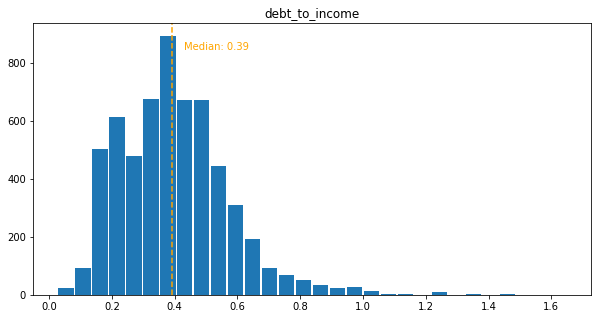

In [80]:
bins = 30
ax = df.hist(
    column='debt_to_income', 
    grid=False, 
    bins=bins,
    figsize=(10,5),
#     color='#86bf91', 
#     zorder=2, 
    rwidth=0.9
)

for axes in ax:
    for x in axes:
    # title = x.get_title()
        median = df['debt_to_income'].median()

        x.axvline(median, color='orange',linestyle='dashed', label='Mean')

        min_ylim, max_ylim = x.get_ylim()
        x.text(median*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(median), color='orange')


## Debt to Income vs. School Type

In [13]:
data = {
    '1-public': df.loc[df['CONTROL'] == 1]['debt_to_income'],
    '2-private': df.loc[df['CONTROL'] == 2]['debt_to_income'],
    '3-private_profit': df.loc[df['CONTROL'] == 3]['debt_to_income']
}
df_type = pd.DataFrame(data)

In [37]:
df_type['1-public'].median()

0.24322660098522167

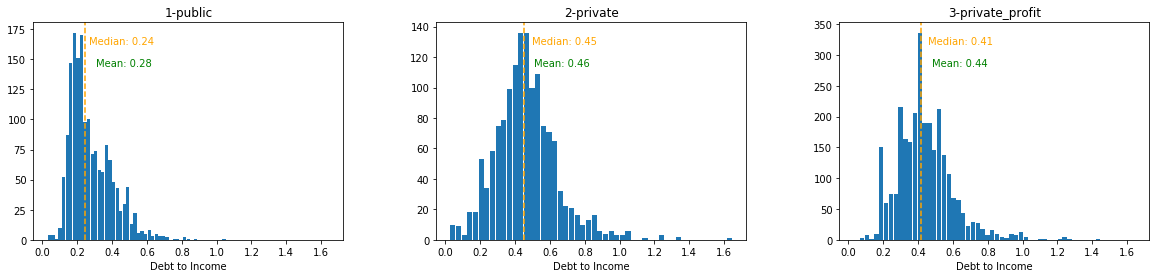

In [52]:
bins = 50
ax = df_type.hist(
    bins=bins, 
    grid=False, 
    figsize=(20,4), 
    layout=(1,3), 
    sharex=True,
#     color='#86bf91', 
#     zorder=2, 
    rwidth=0.9
)

# print(ax)

ax = ax[0]
for x in ax:
    title = x.get_title()
    median = df_type[title].median()
    mean = df_type[title].mean()
    
    x.set_xlabel('Debt to Income')
    x.axvline(median, color='orange',linestyle='dashed', label='Mean')
    
    min_ylim, max_ylim = x.get_ylim()
    x.text(median*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(median), color='orange')
    x.text(mean*1.1, max_ylim*0.8, 'Mean: {:.2f}'.format(mean), color='green')

#     x.text('Median: ' + str(median))
    
#     plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)



## Debt Level - Household income level

In [16]:
# df.loc[df['CONTROL'] == 1]

In [17]:
# DEBT_N
# GRAD_DEBT_N
# WDRAW_DEBT_N

# LO_INC_DEBT_N
# MD_INC_DEBT_N
# HI_INC_DEBT_N

# FEMALE_DEBT_N
# MALE_DEBT_N

In [18]:
data = {
    '1-LO_INC_DEBT_N': df['LO_INC_DEBT_N'],
    '2-MD_INC_DEBT_N': df['MD_INC_DEBT_N'],
    '3-HI_INC_DEBT_N': df['HI_INC_DEBT_N']
}
df_debt_income = pd.DataFrame(data)

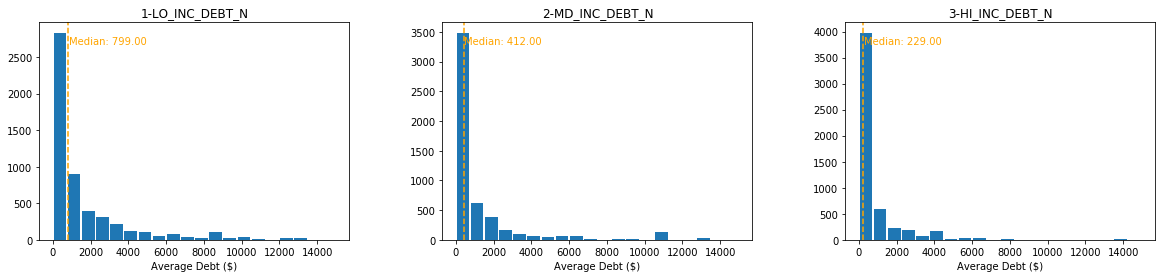

In [95]:
bins = 20
ax = df_debt_income.hist(
#     column=['LO_INC_DEBT_N', 'MD_INC_DEBT_N', 'HI_INC_DEBT_N'],
    bins=bins, 
    grid=False, 
    figsize=(20,4), 
    layout=(1,3), 
    sharex=True,
    range=(0,15000),
    rwidth=0.9
)
# ax = ax[0]
# for x in ax:
    

for axes in ax:
    for x in axes:
        title = x.get_title()
        x.set_xlabel('Average Debt ($)')
        median = df_debt_income[title].median()

        x.axvline(median, color='orange',linestyle='dashed', label='Mean')

        min_ylim, max_ylim = x.get_ylim()
        x.text(median*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(median), color='orange')

In [20]:
# # df_pub.hist(column='LO_INC_DEBT_N')
# # df_pub.hist(column='MD_INC_DEBT_N')
# # df_pub.hist(column='HI_INC_DEBT_N')


# data = {
#     'LO_INC_DEBT_N': df_pub['LO_INC_DEBT_N'],
#     'MD_INC_DEBT_N': df_pub['MD_INC_DEBT_N'],
#     'HI_INC_DEBT_N': df_pub['HI_INC_DEBT_N']
# }
# df_debt = pd.DataFrame(data)
# # df_debt = pd.DataFrame(
# #     [df_pub['LO_INC_DEBT_N'], 
# #     df_pub['MD_INC_DEBT_N'], 
# #     df_pub['HI_INC_DEBT_N']]
# # )

# bins = 50

# # df_debt.head()

# # df_debt.hist()
# ax = df_debt.plot.hist(bins=bins, histtype='step')


## Debt-to-Income Geography

In [21]:
df.head()

UNITID    OPEID  OPEID6                               INSTNM        CITY  \
0  100654   100200    1002             Alabama A & M University      Normal   
1  100663   105200    1052  University of Alabama at Birmingham  Birmingham   
2  100690  2503400   25034                   Amridge University  Montgomery   
3  100706   105500    1055  University of Alabama in Huntsville  Huntsville   
4  100724   100500    1005             Alabama State University  Montgomery   

  STABBR         ZIP  ACCREDAGENCY  INSTURL  NPCURL  SCH_DEG  HCM2  MAIN  \
0     AL       35762           NaN      NaN     NaN      3.0   NaN     1   
1     AL  35294-0110           NaN      NaN     NaN      3.0   NaN     1   
2     AL  36117-3553           NaN      NaN     NaN      3.0   NaN     1   
3     AL       35899           NaN      NaN     NaN      3.0   NaN     1   
4     AL  36104-0271           NaN      NaN     NaN      3.0   NaN     1   

   NUMBRANCH  PREDDEG  HIGHDEG  CONTROL  ST_FIPS  REGION  LOCALE  LOCALE2  \
0          1        3        4        1        1       5     NaN      NaN   
1          1        3        4        1        1       5     NaN      NaN   
2          1        3        4        2        1       5     NaN      NaN   
3          1        3        4        1        1       5     NaN      NaN   
4          1        3        4        1        1       5     NaN      NaN   

   LATITUDE  LONGITUDE  CCBASIC  CCUGPROF  CCSIZSET  HBCU  PBI  ANNHI  TRIBAL  \
0       NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN     NaN   
1       NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN     NaN   
2       NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN     NaN   
3       NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN     NaN   
4       NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN     NaN   

   AANAPII  HSI  NANTI  MENONLY  WOMENONLY  RELAFFIL  ADM_RATE  ADM_RATE_ALL  \
0      NaN  NaN    NaN      NaN        NaN       NaN    0.8989        0.8989   
1      NaN  NaN    NaN      NaN        NaN       NaN    0.8673        0.8673   
2      NaN  NaN    NaN      NaN        NaN       NaN       NaN           NaN   
3      NaN  NaN    NaN      NaN        NaN       NaN    0.8062        0.8062   
4      NaN  NaN    NaN      NaN        NaN       NaN    0.5125        0.5125   

   SATVR25  SATVR75  SATMT25  SATMT75  SATWR25  SATWR75  SATVRMID  SATMTMID  \
0    370.0    450.0    350.0    450.0      NaN      NaN     410.0     400.0   
1    520.0    640.0    520.0    650.0      NaN      NaN     580.0     585.0   
2      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN   
3    510.0    640.0    510.0    650.0      NaN      NaN     575.0     580.0   
4    380.0    480.0    370.0    480.0      NaN      NaN     430.0     425.0   

   SATWRMID  ACTCM25  ACTCM75  ACTEN25  ACTEN75  ACTMT25  ACTMT75  ACTWR25  \
0       NaN     15.0     19.0     14.0     19.0     15.0     18.0      NaN   
1       NaN     22.0     28.0     22.0     29.0     20.0     26.0      NaN   
2       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3       NaN     23.0     29.0     22.0     30.0     22.0     28.0      NaN   
4       NaN     15.0     19.0     14.0     20.0     15.0     18.0      NaN   

   ACTWR75  ACTCMMID  ACTENMID  ACTMTMID  ACTWRMID  SAT_AVG  SAT_AVG_ALL  \
0      NaN      17.0      17.0      17.0       NaN    823.0        823.0   
1      NaN      25.0      26.0      23.0       NaN   1146.0       1146.0   
2      NaN       NaN       NaN       NaN       NaN      NaN          NaN   
3      NaN      26.0      26.0      25.0       NaN   1180.0       1180.0   
4      NaN      17.0      17.0      17.0       NaN    830.0        830.0   

   PCIP01  PCIP03  PCIP04  PCIP05  PCIP09  PCIP10  PCIP11  PCIP12  PCIP13  \
0  0.0397  0.0199  0.0116  0.0000  0.0000  0.0348  0.0348     0.0  0.1490   
1  0.0000  0.0000  0.0000  0.0018  0.0456  0.0000  0.0099     0.0  0.0862   
2  0.000

In [22]:
# 0-U.S. Service Schools
# 1-New England (CT, ME, MA, NH, RI, VT)
# 2-Mid East (DE, DC, MD, NJ, NY, PA)
# 3-Great Lakes (IL, IN, MI, OH, WI)
# 4-Plains (IA, KS, MN, MO, NE, ND, SD)
# 5-Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)
# 6-Southwest (AZ, NM, OK, TX)
# 7-Rocky Mountains (CO, ID, MT, UT, WY)
# 8-Far West (AK, CA, HI, NV, OR, WA)
# 9-Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)

data = {
#     '0-Service-Schools': df.loc[df['REGION'] == 0]['debt_to_income'],
    '1-New-England': df.loc[df['REGION'] == 1]['debt_to_income'],
    '2-Mid-East': df.loc[df['REGION'] == 2]['debt_to_income'],
    '3-Great-Lakes': df.loc[df['REGION'] == 3]['debt_to_income'],
    '4-Plains': df.loc[df['REGION'] == 4]['debt_to_income'],
    '5-Southeast': df.loc[df['REGION'] == 5]['debt_to_income'],
    '6-Southwest': df.loc[df['REGION'] == 6]['debt_to_income'],
    '7-Rocky-Mountains': df.loc[df['REGION'] == 7]['debt_to_income'],
    '8-Far-West': df.loc[df['REGION'] == 8]['debt_to_income'],
#     '9-Outlying-Areas': df.loc[df['REGION'] == 9]['debt_to_income'],
}
df_region = pd.DataFrame(data)

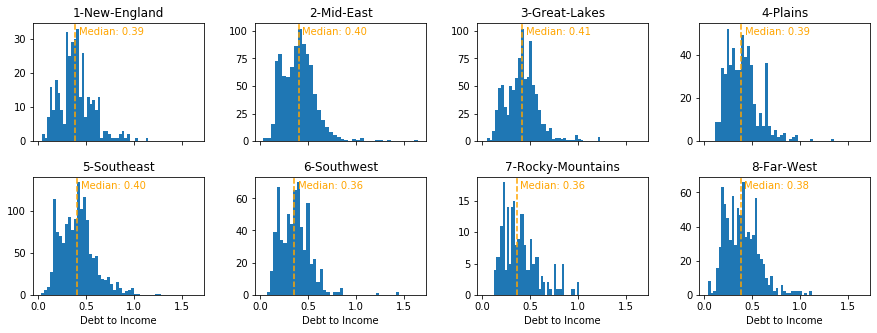

In [59]:
bins = 40
ax = df_region.hist(
    bins=bins, 
    grid=False, 
    figsize=(15,5), 
    layout=(2,4), 
    sharex=True,
#     range=(0,1.5),
#     color='#86bf91', 
#     zorder=2, 
#     rwidth=0.9
)
ax1 = ax[0]
for axes in ax:
    for x in axes:
        title = x.get_title()
        median = df_region[title].median()
        mean = df_region[title].mean()

        x.set_xlabel('Debt to Income')
        x.axvline(median, color='orange',linestyle='dashed', label='Mean')

        min_ylim, max_ylim = x.get_ylim()
        x.text(median*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(median), color='orange')
    #     x.text(mean*1.1, max_ylim*0.8, 'Mean: {:.2f}'.format(mean), color='green')
